# Training
This notebook goes through the steps to train tree-based models using 8-fold cross-validation and evaluate the performance on the training data.

Make sure you have ***preprocessed the data first*** so that the inputs fit seemlessly with the model classes. Preprocessing is explained in ```0_process_data.ipynb```. Since these models are tree-based scaling the data is not necessary.

### Housekeeping

In [1]:
import os

from cyc_pep_perm.data.paths import MODEL_PATH, TRAIN_RANDOM_DW, TRAIN_RANDOM_MORDRED

## Random Forest

### Train model
The example is carried out with the provided descriptors from DataWarrior. If one wants to train and evaluate the model with mordred descriptors the code is the same, just change the paths to the input data (provded above in Housekeeping, too).

In [2]:
from cyc_pep_perm.models.randomforest import RF

# instantiate class
rf_regressor = RF()

# traing a model using cross-validation
# XXX: this will take some time especially if not on a GPU
# and if you use all the default hyperparameters defined in the script to search over

# define where to save the model to
savepath = os.path.join(MODEL_PATH, "rf_best8cv_datawarrior_random.pkl")

model = rf_regressor.train(datapath=TRAIN_RANDOM_DW, savepath=savepath)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Best parameters: {'n_estimators': 200}


In [4]:
# get predictions on the training data
y_pred, rmse, r2 = rf_regressor.evaluate()
print(f"Training RMSE = {rmse:0.2f}")
print(f"Training R2 = {r2:0.2f}")

RMSE: 8.455
R-squared: 0.879
Training RMSE = 8.46
Training R2 = 0.88


### Plot results

Text(0.05, 0.85, 'R2 = 0.88')

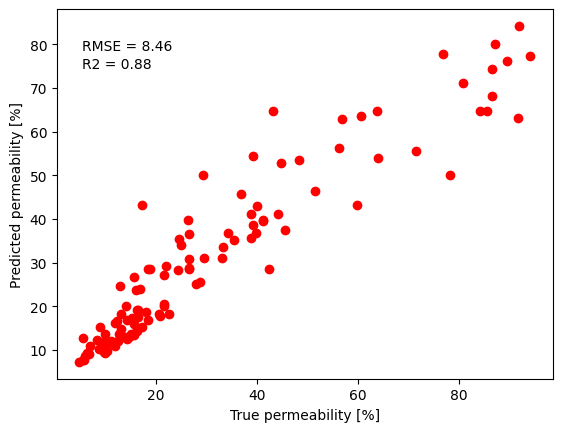

In [5]:
# plot predictions
import matplotlib.pyplot as plt

y_true = rf_regressor.y

plt.scatter(y_true, y_pred, color="r")
plt.xlabel("True permeability [%]")
plt.ylabel("Predicted permeability [%]")
# plot rme and r2
plt.text(0.05, 0.9, "RMSE = %0.2f" % rmse, ha="left", va="center", transform=plt.gca().transAxes)
plt.text(0.05, 0.85, "R2 = %0.2f" % r2, ha="left", va="center", transform=plt.gca().transAxes)

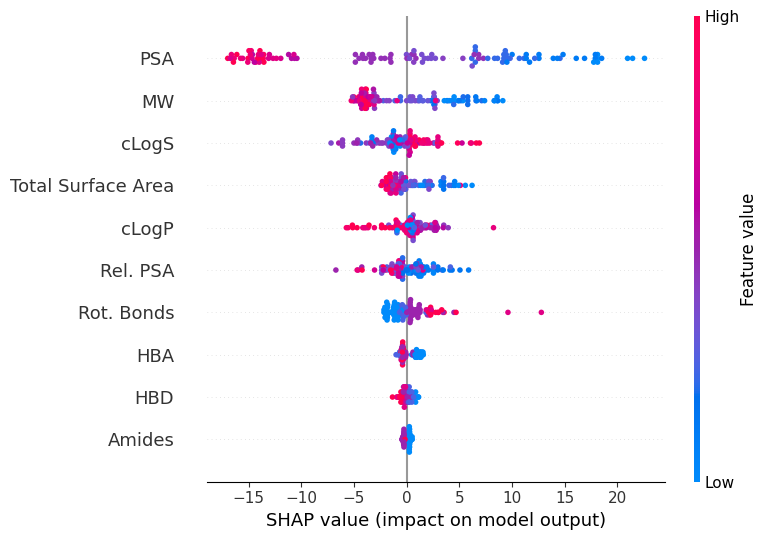

In [6]:
# this plot tells you the contribution of different features to the prediction
shap_values = rf_regressor.shap_explain(rf_regressor.X)

## XGBoost

### Train model
The example is carried out with the provided descriptors from DataWarrior. If one wants to train and evaluate the model with mordred descriptors the code is the same, just change the paths to the input data (provded above in Housekeeping, too).

In [ ]:
from cyc_pep_perm.models.xgboost import XGB

# instantiate class
xgb_regressor = XGB()

# traing a model using cross-validation
# XXX: this will take some time especially if not on a GPU
# and if you use all the default hyperparameters defined in the script to search over

# define where to save the model to
savepath = os.path.join(MODEL_PATH, "xgb_best8cv_datawarrior_random.pkl")

model = xgb_regressor.train(datapath=TRAIN_RANDOM_DW, savepath=savepath)

In [ ]:
# get predictions on the training data
y_pred, rmse, r2 = xgb_regressor.evaluate()
print(f'Training RMSE = {rmse%0.2f}')
print(f'Training R2 = {r2%0.2f}')

### Plot results

In [ ]:
# plot predictions
import matplotlib.pyplot as plt

y_true = xgb_regressor.y

plt.scatter(y_true, y_pred, color="r")
plt.xlabel("True permeability [%]")
plt.ylabel("Predicted permeability [%]")
# plot rme and r2
plt.text(0.05, 0.9, "RMSE = %0.2f" % rmse, ha="left", va="center", transform=plt.gca().transAxes)
plt.text(0.05, 0.85, "R2 = %0.2f" % r2, ha="left", va="center", transform=plt.gca().transAxes)

In [ ]:
# this plot tells you the contribution of different features to the prediction
shap_values = xgb_regressor.shap_explain(xgb_regressor.X)